In [66]:
import requests
import pandas as pd
import json
import csv
from datetime import datetime
from bs4 import BeautifulSoup
class episode:

    def __init__(self,url):
        self.url=url
    def data_download(self):
        response = requests.get(self.url)
        data = json.loads(response.text)
        data1=data['_embedded']['episodes']
        return data1
    def csv_file(self):
        data1=self.data_download()
        
        csv_file=open('df.csv','w')
        csv_writer=csv.writer(csv_file) #creating the object of the csv file
        count=0
        
        for i in data1:
            
            if count==0:
                header=i.keys()
                csv_writer.writerow(header)
                count+=1
            csv_writer.writerow(i.values())
        csv_file.close()
        df1=pd.read_csv('df.csv')
        #print(df1)
        return df1
    def date_time(self):
        df=self.csv_file()
        df['airtime'] = pd.to_datetime(df['airtime'])
        df['airtime'] = df['airtime'].dt.strftime("%I:%M %p")
        # Convert time string to time format in 12-hour format
        df['airtime'] = df['airtime'].apply(lambda x: datetime.strptime(x, '%I:%M %p').strftime('%I:%M %p'))
        df['airdate']=pd.to_datetime(df['airdate'])
        df['runtime']=df['runtime'].astype(float) # Changing the datatype to float
        # Getting the average rating from rating column
        def evaluate(i):
            k=eval(i)['average']
            return k
        df['average rating']=df['rating'].apply(evaluate)
        # Creating a new column for medium & original image link
        for i in df['image']:
            a=eval(i)
            df['medium image link']=a['medium']
            df['Original image link']=a['original']
        
        return df
            
    def extract_summary(self):
        df=self.date_time()
        def extract_summary(html):
            
            soup = BeautifulSoup(html, 'html.parser')
            summary_tag = soup.find('p')
            if summary_tag:
                return summary_tag.get_text()
            else:
                return ""

        # Applying function to extract summaries
        df['summary'] = df['summary'].apply(extract_summary)
        df=df.drop(columns=['airstamp','rating','_links','image'])
        
        return df
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
a=episode(url)
df=a.extract_summary()
df.dtypes
            
        
        
    
    
        
        




id                              int64
url                            object
name                           object
season                          int64
number                          int64
type                           object
airdate                datetime64[ns]
airtime                        object
runtime                       float64
summary                        object
average rating                float64
medium image link              object
Original image link            object
dtype: object

In [67]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,Bernard continues to investigate Dolores' supp...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,While Dolores joins William and Logan on their...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [68]:
#Overall ratings for each season and using plots compare the ratings for all the seasons,\
#like season 1 ratings, season 2, and so on.
season_1=df[df['season']==1]
season_2=df[df['season']==2]
season_3=df[df['season']==3]
season_4=df[df['season']==4]


In [69]:
s1=season_1['average rating'].mean()
s2=season_2['average rating'].mean()
s3=season_3['average rating'].mean()
s4=season_4['average rating'].mean()

Text(0, 0.5, 'Avg rating')

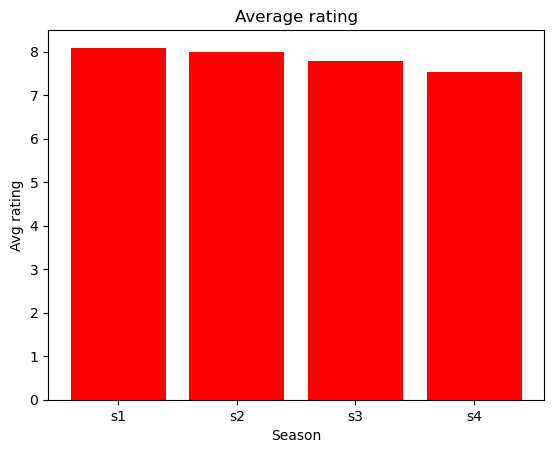

In [87]:
# Comparing the rating of each season
plt.bar(x=['s1','s2','s3','s4'],height=[s1,s2,s3,s4],color='r')
plt.title('Average rating')
plt.xlabel('Season')
plt.ylabel('Avg rating')

In [88]:
#  Get all the episode names, whose average rating is more than 8 for every season
#for season 1
season_1[season_1['average rating']>8]['name']

6                Trompe L'Oeil
8    The Well-Tempered Clavier
9           The Bicameral Mind
Name: name, dtype: object

In [89]:
#for season 2
season_2[season_2['average rating']>8]['name']

17            Kiksuya
18    Vanishing Point
19      The Passenger
Name: name, dtype: object

In [90]:
#for season 3
season_3[season_3['average rating']>8]['name']

Series([], Name: name, dtype: object)

In [91]:
#for season 4
season_4[season_4['average rating']>8]['name']

Series([], Name: name, dtype: object)

In [92]:
# Get all the episode names that aired before May 2019
df[(df['airdate'].dt.year<2019) & (df['airdate'].dt.month<5)]['name']

10    Journey Into Night
11               Reunion
Name: name, dtype: object

In [100]:
#  Get the episode name from each season with the highest and lowest rating
#For season 1
print(season_1[season_1['average rating']==season_1['average rating'].max()]['name'])
print(season_1[season_1['average rating']==season_1['average rating'].min()]['name'])

9    The Bicameral Mind
Name: name, dtype: object
2    The Stray
Name: name, dtype: object


In [101]:
#  Get the episode name from each season with the highest and lowest rating
# For season 2
print(season_2[season_2['average rating']==season_2['average rating'].max()]['name'])
print(season_2[season_2['average rating']==season_2['average rating'].min()]['name'])

17    Kiksuya
Name: name, dtype: object
14    Akane No Mai
Name: name, dtype: object


In [102]:
#  Get the episode name from each season with the highest and lowest rating
# For season 3
print(season_3[season_3['average rating']==season_3['average rating'].max()]['name'])
print(season_3[season_3['average rating']==season_3['average rating'].min()]['name'])

20            Parce Domine
23    The Mother of Exiles
Name: name, dtype: object
25    Decoherence
26    Passed Pawn
Name: name, dtype: object


In [103]:
#  Get the episode name from each season with the highest and lowest rating
# For season 4
print(season_4[season_4['average rating']==season_4['average rating'].max()]['name'])
print(season_4[season_4['average rating']==season_4['average rating'].min()]['name'])

32    Zhuangzi
Name: name, dtype: object
28    The Auguries
Name: name, dtype: object


In [ ]:
# Comparing the chart of each season with minimum and maximum rating

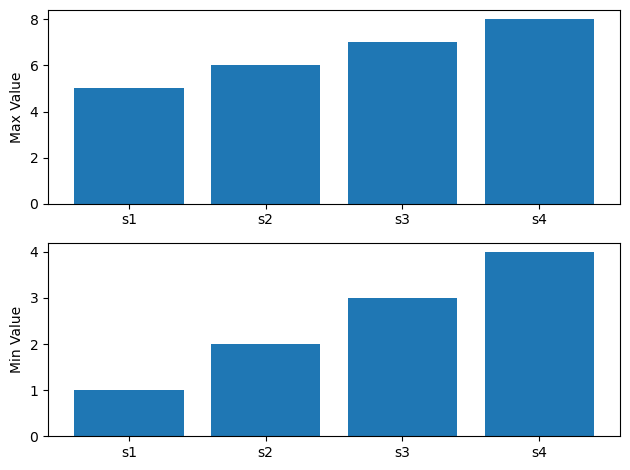

In [106]:
max1,min1=max(season_1["average rating"]), min(season_1["average rating"])
max2,min2=max(season_2["average rating"]),min(season_2["average rating"])
max3,min3=max(season_3["average rating"]),min(season_3["average rating"])
max4,min4=max(season_4["average rating"]),min(season_4["average rating"])
a=[(max1,min1),(max2,min2),(max3,min3),(max4,min4)]
labels=['s1','s2','s3','s4']

fig, (ax1, ax2) = plt.subplots(2)

# Creating a bar plot for maximum values
ax1.bar(labels, max_values)
ax1.set_ylabel('Max Value')

# Creating a bar plot for minimum values
ax2.bar(labels, min_values)
ax2.set_ylabel('Min Value')

# Adjusting the layout and spacing
fig.tight_layout()

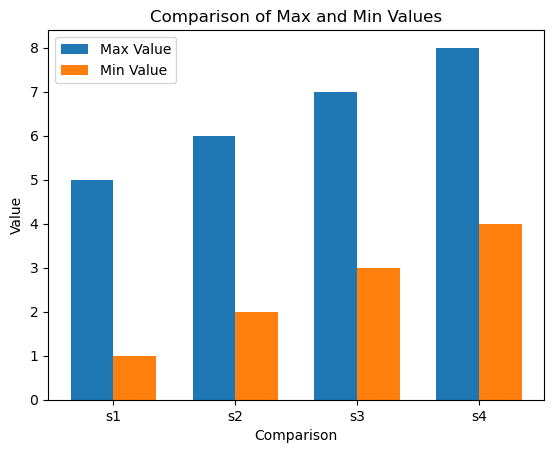

In [107]:
indices = np.arange(len(a))

# Setting the width of each bar
bar_width = 0.35

# Creating a figure and a subplot
fig, ax = plt.subplots()

# Creating bar plots for maximum and minimum values
ax.bar(indices, max_values, bar_width, label='Max Value')
ax.bar(indices + bar_width, min_values, bar_width, label='Min Value')

# Setting labels, title, and legend
ax.set_xlabel('Comparison')
ax.set_ylabel('Value')
ax.set_title('Comparison of Max and Min Values')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Displaying the plot
plt.show()

In [108]:
# ● Get the summary for the most popular ( ratings ) episode in every season
#For season 1
season_1[season_1['average rating']==mode(season_1['average rating'])]

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00 PM,60.0,"While Maeve convinces Felix to show her ""upsta...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [109]:
# ● Get the summary for the most popular ( ratings ) episode in every season
# For season 2
season_2[season_2['average rating']==mode(season_2['average rating'])]

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
11,1440915,https://www.tvmaze.com/episodes/1440915/westwo...,Reunion,2,2,regular,2018-04-29,09:00 PM,60.0,Dolores looks for allies sympathetic to her ca...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
12,1440916,https://www.tvmaze.com/episodes/1440916/westwo...,Virtù e Fortuna,2,3,regular,2018-05-06,09:00 PM,60.0,While Delores makes a deal with the Confederad...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
15,1453278,https://www.tvmaze.com/episodes/1453278/westwo...,Phase Space,2,6,regular,2018-05-27,09:00 PM,60.0,"Maeve finds her daughter, Delores finds the ""r...",7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [110]:
# ● Get the summary for the most popular ( ratings ) episode in every season
# For season 3
season_3[season_3['average rating']==mode(season_3['average rating'])]

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
20,1789333,https://www.tvmaze.com/episodes/1789333/westwo...,Parce Domine,3,1,regular,2020-03-15,09:00 PM,70.0,"If you're stuck in a loop, try walking in a st...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
23,1800148,https://www.tvmaze.com/episodes/1800148/westwo...,The Mother of Exiles,3,4,regular,2020-04-05,09:00 PM,70.0,The truth doesn't always set you free.,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [111]:
# ● Get the summary for the most popular ( ratings ) episode in every season
season_4[season_4['average rating']==mode(season_4['average rating'])]

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
31,2326657,https://www.tvmaze.com/episodes/2326657/westwo...,Generation Loss,4,4,regular,2022-07-17,09:00 PM,51.0,Should auld acquaintance be forgot and days of...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
34,2326660,https://www.tvmaze.com/episodes/2326660/westwo...,Metanoia,4,7,regular,2022-08-07,09:00 PM,60.0,You want to have a drink at a time like this?,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [112]:
#Get the summary for the most popular ( ratings ) episode in every season
from statistics import mode

mode_rating_1 = mode(season_1['average rating'])
mode_rating_2 = mode(season_2['average rating'])
mode_rating_3 = mode(season_3['average rating'])
mode_rating_4 = mode(season_4['average rating'])
print(mode_rating_1)
print(mode_rating_2)
print(mode_rating_3)
print(mode_rating_4)

8.0
7.7
8.0
7.7
